<a href="https://colab.research.google.com/github/trunggiang2202/death-analysis/blob/main/death_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)

df.head(9)

Entity  Year  \
0  United States  2009   
1  United States  2010   
2  United States  2011   
3  United States  2012   
4  United States  2013   
5  United States  2014   
6  United States  2015   
7  United States  2016   
8  United States  2017   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                             1186.0          
1                                             1141.0          
2                                             1126.0          
3                                             1108.0          
4                                             1106.0          
5                                             1102.0          
6                                             1115.0          
7                                             1131.0          
8                                             1137.0          

   Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)  \
0                                           644331.0         
1                                           648290.0         
2                                           659516.0         
3                                           668318.0         
4                                           678428.0         
5                                           689157.0         
6                                           700941.0         
7                                           715197.0         
8                                           725719.0         

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       
5                                                0.0       
6                                                0.0       
7                                                0.0       
8                                                0.0       

   Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)  \
0                                            10551.0        
1                                             9143.0        
2                                             8428.0        
3                                             7973.0        
4                                             7682.0        
5                                             7413.0        
6                                             7089.0        
7                                             7430.0        
8                                             7338.0        

   Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)  \
0                                              891.0            
1                                              868.0            
2                                              862.0            
3                                              858.0            
4                                              871.0            
5                                              879.0            
6                                              900.0            
7                                              927.0            
8                                              929.0            

   Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)  \
0                                            68989.0                            
1                                            68625.0                            
2                                            69967.0                            
3                                            70573.0                            
4                                            72196.0                            
5                                            73161.0                            
6                                            74766.0               

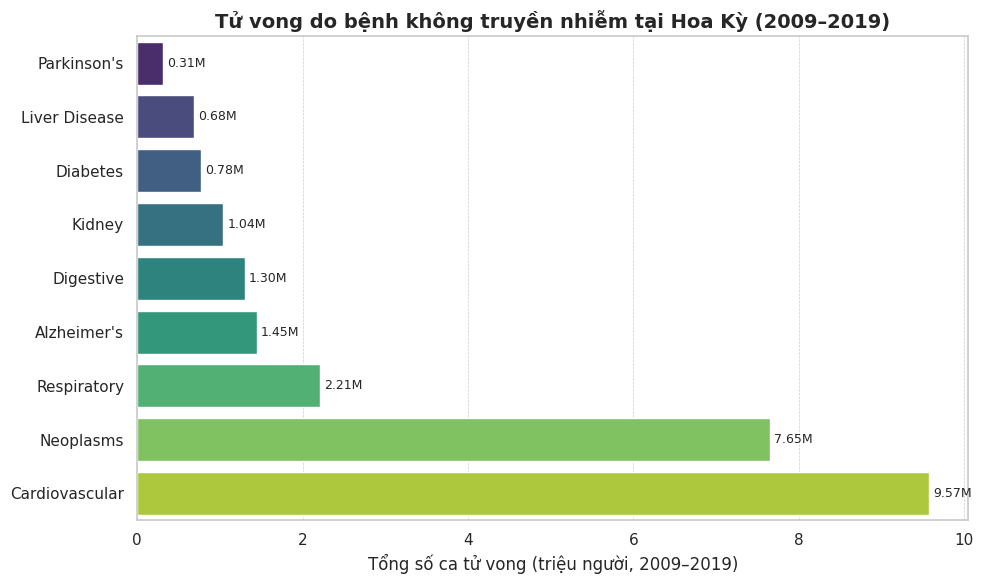

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc d·ªØ li·ªáu
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# Mapping t√™n ng·∫Øn
column_mapping = {
    'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)': 'Neoplasms',
    'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)': 'Diabetes',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)': 'Cardiovascular',
    'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)': 'Respiratory',
    'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)': 'Kidney',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)': 'Liver Disease',
    'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)': 'Digestive',
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)": "Alzheimer's",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)": "Parkinson's"
}

# D·ªØ li·ªáu Hoa K·ª≥ 2009‚Äì2019
df_us = df[(df['Entity'] == 'United States') & (df['Year'].between(2009, 2019))]

# T·ªïng t·ª≠ vong m·ªói b·ªánh (tri·ªáu ng∆∞·ªùi)
total_deaths = df_us[list(column_mapping.keys())].sum().rename(column_mapping)
total_deaths = total_deaths.sort_values() / 1_000_000  # chia tri·ªáu

# T·∫°o DataFrame ƒë·ªÉ seaborn v·∫Ω
data_plot = pd.DataFrame({
    'Disease': total_deaths.index,
    'Deaths_Millions': total_deaths.values
})

# V·∫Ω bi·ªÉu ƒë·ªì
sns.set(style="whitegrid")  # B·∫≠t grid m·∫∑c ƒë·ªãnh
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=data_plot,
    x='Deaths_Millions',
    y='Disease',
    hue='Disease',
    palette='viridis',
    dodge=False,
    legend=False
)

# Ghi s·ªë li·ªáu
for i, v in enumerate(data_plot['Deaths_Millions']):
    ax.text(v + 0.05, i, f"{v:.2f}M", va='center', fontsize=9)

# B·∫≠t grid tr·ª•c x
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
ax.yaxis.grid(False)

# Hi·ªán khung ngo√†i (spines)
for spine in ax.spines.values():
    spine.set_visible(True)

# T√πy ch·ªânh
ax.set_xlabel("T·ªïng s·ªë ca t·ª≠ vong (tri·ªáu ng∆∞·ªùi, 2009‚Äì2019)")
ax.set_ylabel("")
ax.set_title("T·ª≠ vong do b·ªánh kh√¥ng truy·ªÅn nhi·ªÖm t·∫°i Hoa K·ª≥ (2009‚Äì2019)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


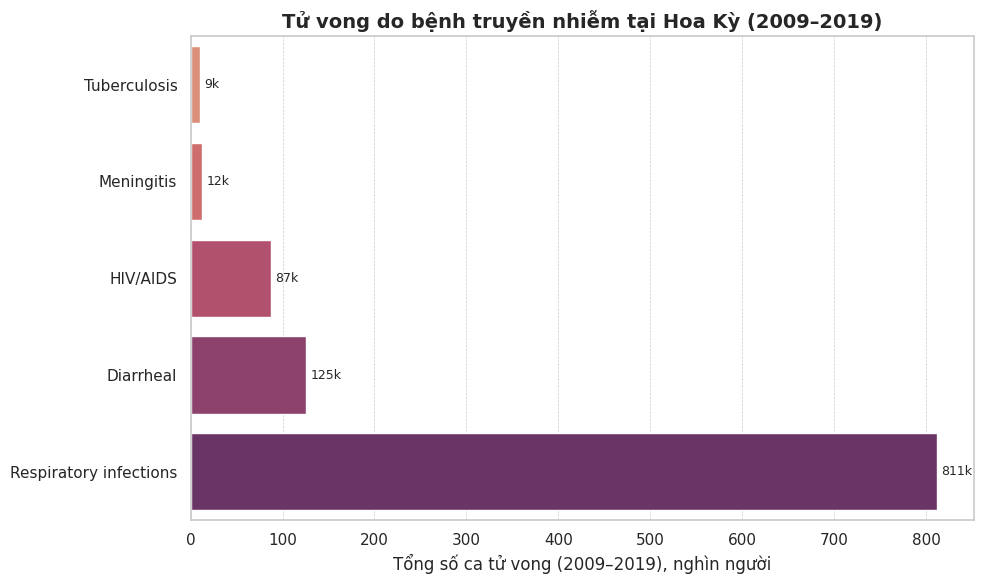

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·ªçc d·ªØ li·ªáu
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()

# √Ånh x·∫° t√™n g·ªçn ‚Äî ƒê√É B·ªé Malaria v√† Acute hepatitis
infectious_mapping = {
    'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)': 'Tuberculosis',
    'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)': 'HIV/AIDS',
    'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)': 'Respiratory infections',
    'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)': 'Diarrheal',
    'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)': 'Meningitis'
}

# L·ªçc d·ªØ li·ªáu US v√† giai ƒëo·∫°n 2009‚Äì2019
df_us = df[(df['Entity'] == 'United States') & (df['Year'].between(2009, 2019))]

# T√≠nh t·ªïng t·ª≠ vong v√† chuy·ªÉn sang ngh√¨n ng∆∞·ªùi (k)
infectious_deaths_raw = df_us[list(infectious_mapping.keys())].sum().rename(infectious_mapping)
infectious_deaths_k = (infectious_deaths_raw / 1000).sort_values()

# Chu·∫©n b·ªã DataFrame
data_plot = pd.DataFrame({
    'Disease': infectious_deaths_k.index,
    'Deaths (k)': infectious_deaths_k.values
})

# V·∫Ω bi·ªÉu ƒë·ªì
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=data_plot,
    x='Deaths (k)',
    y='Disease',
    hue='Disease',         # Th√™m d√≤ng n√†y
    dodge=False,           # ƒê·∫£m b·∫£o kh√¥ng b·ªã l·ªách c√°c thanh
    palette='flare',
    legend=False           # ·∫®n ch√∫ th√≠ch m√†u
)


# Ghi nh√£n s·ªë
for i, v in enumerate(data_plot['Deaths (k)']):
    ax.text(v + 5, i, f"{int(v):,}k", va='center', fontsize=9)

# Th√™m l∆∞·ªõi v√† khung
ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_visible(True)

# G·∫Øn nh√£n v√† ti√™u ƒë·ªÅ
ax.set_xlabel("T·ªïng s·ªë ca t·ª≠ vong (2009‚Äì2019), ngh√¨n ng∆∞·ªùi")
ax.set_ylabel("")
ax.set_title("T·ª≠ vong do b·ªánh truy·ªÅn nhi·ªÖm t·∫°i Hoa K·ª≥ (2009‚Äì2019)", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import plotly.express as px

# --- ƒê·ªçc d·ªØ li·ªáu t·ª´ GitHub ---
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)

# --- Ti·ªÅn x·ª≠ l√Ω ---
df_melted = df.melt(id_vars=['Entity', 'Year'], var_name='cause', value_name='deaths')

# L√†m s·∫°ch t√™n nguy√™n nh√¢n
df_melted['cause'] = df_melted['cause']\
    .str.replace(r'Deaths - ', '', regex=True)\
    .str.replace(r' - Sex:.*', '', regex=True)

# --- Ch·ªçn top 9 nguy√™n nh√¢n g√¢y t·ª≠ vong ---
top_causes = df_melted.groupby('cause')['deaths'].sum().nlargest(9).index
df_filtered = df_melted[df_melted['cause'].isin(top_causes)].copy()

# --- ƒê·∫£m b·∫£o ƒë·ªß t·∫•t c·∫£ nƒÉm t·ª´ 2009 ƒë·∫øn 2019 ---
years = list(range(2009, 2020))
df_filtered['Year'] = df_filtered['Year'].astype(int)

# T·∫°o khung ƒë·∫ßy ƒë·ªß m·ªçi c·∫∑p (nƒÉm, nguy√™n nh√¢n)
full_grid = pd.MultiIndex.from_product([years, top_causes], names=['Year', 'cause']).to_frame(index=False)

# T·ªïng h·ª£p s·ªë t·ª≠ vong th·∫≠t
agg = df_filtered.groupby(['Year', 'cause'])['deaths'].sum().reset_index()

# Merge ƒë·ªÉ l·∫•p gi√° tr·ªã thi·∫øu ‚Üí NaN ‚Üí 0
merged = pd.merge(full_grid, agg, on=['Year', 'cause'], how='left').fillna(0)

# Pivot l·∫°i theo ƒë·ªãnh d·∫°ng cause x year
pivot_df = merged.pivot(index='cause', columns='Year', values='deaths')

# ƒê·∫£m b·∫£o c·ªôt ƒë√∫ng th·ª© t·ª±
pivot_df = pivot_df.reindex(columns=years)

# --- V·∫Ω heatmap ---
fig = px.imshow(
    pivot_df,
    labels=dict(x="NƒÉm", y="Nguy√™n nh√¢n", color="S·ªë ca t·ª≠ vong"),
    text_auto=True,
    color_continuous_scale='Reds',
    aspect='auto'
)

# --- C·∫≠p nh·∫≠t b·ªë c·ª•c ---
fig.update_layout(
    title="üî• Heatmap: T·ª≠ vong theo 9 nguy√™n nh√¢n h√†ng ƒë·∫ßu (2009‚Äì2019)",
    font=dict(family='Roboto, sans-serif', size=20),
    width=1450,
    height=600,
    margin=dict(t=60, l=80, r=30, b=60),
    xaxis_title="NƒÉm",
    yaxis_title="Nguy√™n nh√¢n"
)

# --- Bu·ªôc hi·ªán ƒë·∫ßy ƒë·ªß nƒÉm ---
fig.update_xaxes(
    type='category',
    tickmode='array',
    tickvals=years,
    ticktext=[str(y) for y in years]
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# ƒê·ªçc d·ªØ li·ªáu
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)

# Ti·ªÅn x·ª≠ l√Ω
df_melted = df.melt(id_vars=['Entity', 'Year'], var_name='cause', value_name='deaths')
df_melted['cause'] = df_melted['cause']\
    .str.replace(r'Deaths - ', '', regex=True)\
    .str.replace(r' - Sex:.*', '', regex=True)

# L·ªçc b·ªánh truy·ªÅn nhi·ªÖm (tr·ª´ Malaria v√† Acute hepatitis)
infectious_causes = [
    'Tuberculosis',
    'HIV/AIDS',
    'Lower respiratory infections',
    'Diarrheal diseases',
    'Meningitis'
]

df_filtered = df_melted[
    (df_melted['Entity'] == 'United States') &
    (df_melted['Year'].between(2009, 2019)) &
    (df_melted['cause'].isin(infectious_causes))
].copy()

# T·∫°o khung ƒë·∫ßy ƒë·ªß c√°c c·∫∑p (nƒÉm, nguy√™n nh√¢n)
years = list(range(2009, 2020))
full_grid = pd.MultiIndex.from_product([years, infectious_causes], names=['Year', 'cause']).to_frame(index=False)
agg = df_filtered.groupby(['Year', 'cause'])['deaths'].sum().reset_index()
merged = pd.merge(full_grid, agg, on=['Year', 'cause'], how='left').fillna(0)

# Pivot l·∫°i
pivot_df = merged.pivot(index='cause', columns='Year', values='deaths')
pivot_df = pivot_df.reindex(columns=years)

# V·∫Ω heatmap
fig = px.imshow(
    pivot_df,
    labels=dict(x="NƒÉm", y="Nguy√™n nh√¢n", color="S·ªë ca t·ª≠ vong"),
    text_auto=True,
    color_continuous_scale='Reds',
    aspect='auto'
)

fig.update_layout(
    title="ü¶† Heatmap: T·ª≠ vong do b·ªánh truy·ªÅn nhi·ªÖm t·∫°i Hoa K·ª≥ (2009‚Äì2019)",
    font=dict(family='Roboto, sans-serif', size=20),
    width=1200,
    height=500,
    margin=dict(t=60, l=80, r=30, b=60),
    xaxis_title="NƒÉm",
    yaxis_title="Nguy√™n nh√¢n"
)

fig.update_xaxes(
    type='category',
    tickmode='array',
    tickvals=years,
    ticktext=[str(y) for y in years]
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# ƒê·ªçc d·ªØ li·ªáu
url = "https://raw.githubusercontent.com/trunggiang2202/death-analysis/main/data/Cause_of_death_2009_2019.csv"
df = pd.read_csv(url)
df = df[df['Entity'] == 'United States']

# L·∫•y danh s√°ch nguy√™n nh√¢n
causes = df.columns.difference(['Entity', 'Year'])

# T√≠nh t·ªïng t·ª≠ vong m·ªói nƒÉm
df['total_deaths_year'] = df[causes].sum(axis=1)

# T√≠nh t·ª∑ l·ªá ph·∫ßn trƒÉm
for cause in causes:
    df[cause + '_pct'] = df[cause] / df['total_deaths_year'] * 100

# Ch·ªçn top 9 nguy√™n nh√¢n t·ª≠ vong nhi·ªÅu nh·∫•t to√†n k·ª≥
top_causes = df[causes].sum().sort_values(ascending=False).head(9).index.tolist()

# T·∫°o bi·ªÉu ƒë·ªì
fig = go.Figure()
years = df['Year'].tolist()

for cause in top_causes:
    percentages = df[cause + '_pct'].round(1)
    cause_label = cause.replace('Deaths - ', '').split(' - Sex:')[0]

    fig.add_trace(go.Bar(
        y=years,
        x=percentages,
        name=cause_label,
        orientation='h',
        text=percentages.astype(str) + '%',
        textposition='inside',
        insidetextanchor='start',
        hoverinfo='skip'
    ))

# Layout
fig.update_layout(
    barmode='stack',
    title='T·ª∑ l·ªá t·ª≠ vong theo 9 nguy√™n nh√¢n h√†ng ƒë·∫ßu (2009‚Äì2019)',
    xaxis_title='T·ª∑ l·ªá t·ª≠ vong (%)',
    yaxis=dict(title='NƒÉm', tickmode='array', tickvals=years),
    font=dict(family='Roboto, sans-serif', size=20),
    width=1900,
    height=750
)

fig.show()